# The Battle of Neighborhoods (Week 2) - Simone's assignment

#### Data download

In [1]:
!wget -q -O 'Stations_data.csv' http://web.mta.info/developers/data/nyct/subway/Stations.csv
print('Data downloaded!')

Data downloaded!


In [2]:
!wget -q -O 'Number_of_transits.xlsx' https://new.mta.info/document/16136
print('Data downloaded!')

Data downloaded!


#### Data import and cleanup

In [3]:
import pandas as pd
transit_weekday = pd.read_excel(r'Number_of_transits.xlsx', 'Average Weekday', header=1, skipfooter=9)
transit_weekend = pd.read_excel(r'Number_of_transits.xlsx', 'Average Weekend', header=1, skipfooter=9)
transit_annual = pd.read_excel(r'Number_of_transits.xlsx', 'Annual Total', header=1, skipfooter=9)

In [4]:
transit_weekday.drop(['Unnamed: 1', '2018-2019 Change', 'Unnamed: 10', '2019 Rank'], axis=1, inplace=True)
transit_weekday.columns= transit_weekday.columns.astype(str)
transit_weekday = transit_weekday.dropna()
transit_weekday = transit_weekday.rename(columns={'Station (alphabetical by borough)': 'Station', 'Boro': 'Borough'})
transit_weekday['Station'] = transit_weekday['Station'].apply(lambda x: x.split(' (')[0])
transit_weekday = transit_weekday.groupby('Station').mean().reset_index()
transit_weekday.reset_index()

transit_weekend.drop(['Unnamed: 1', '2018-2019 Change', 'Unnamed: 10', '2019 Rank'], axis=1, inplace=True)
transit_weekend.columns= transit_weekend.columns.astype(str)
transit_weekend = transit_weekend.dropna()
transit_weekend = transit_weekend.rename(columns={'Station (alphabetical by borough)': 'Station', 'Boro': 'Borough'})
transit_weekend['Station'] = transit_weekend['Station'].apply(lambda x: x.split(' (')[0])
transit_weekend = transit_weekend.groupby('Station').mean().reset_index()
transit_weekend.reset_index()

transit_annual.drop(['Unnamed: 1', '2018-2019 Change', 'Unnamed: 10', '2019 Rank'], axis=1, inplace=True)
transit_annual.columns= transit_annual.columns.astype(str)
transit_annual = transit_annual.dropna()
transit_annual = transit_annual.rename(columns={'Station (alphabetical by borough)': 'Station', 'Boro': 'Borough'})
transit_annual['Station'] = transit_annual['Station'].apply(lambda x: x.split(' (')[0])
transit_annual = transit_annual.groupby('Station').sum().reset_index()
transit_annual.reset_index()

,index,Station,2014,2015,2016,2017,2018,2019
0,0,1 Av,8111070.0,7702110.0,7660896.0,7071729.0,6743140.0,5345371.0
1,1,103 St,10953674.0,9810965.0,10108724.0,9987198.0,9768631.0,9303988.0
2,2,103 St-Corona Plaza,6464627.0,6527196.0,6504644.0,6498237.0,6319564.0,6399657.0
3,3,104 St,1216034.0,1379945.0,1477450.0,1062850.0,1005636.0,1311812.0
4,4,110 St,3955522.0,4209449.0,4196711.0,3734660.0,3394176.0,3316061.0
...,...,...,...,...,...,...,...,...
334,334,Woodhaven Blvd,8631125.0,8671627.0,8658219.0,8384085.0,7880275.0,7718919.0
335,335,Woodlawn,2375663.0,2418890.0,2380900.0,2242100.0,2160859.0,2094285.0
336,336,Woodside-61 St,5356621.0,5432682.0,5511564.0,5457171.0,5282486.0,5345369.0
337,337,York St,2760385.0,2900416.0,3286640.0,3172717.0,3256154.0,3927129.0


In [5]:
stations_data = pd.read_csv ('Stations_data.csv')
stations_data.drop(['Station ID', 'Complex ID', 'GTFS Stop ID', 'Division', 'Structure', 'North Direction Label', 'South Direction Label', 'ADA', 'ADA Notes'], axis=1, inplace=True)
stations_data = stations_data.rename(columns={'Stop Name': 'Station'})
stations_data = stations_data.dropna()
stations_data = stations_data.groupby('Station').mean().reset_index()
stations_data

,Station,GTFS Latitude,GTFS Longitude
0,1 Av,40.730953,-73.981628
1,103 St,40.795379,-73.959104
2,103 St-Corona Plaza,40.749865,-73.862700
3,104 St,40.688445,-73.841006
4,110 St,40.795020,-73.944250
...,...,...,...
374,Woodlawn,40.886037,-73.878751
375,Woodside-61 St,40.745630,-73.902984
376,World Trade Center,40.712582,-74.009781
377,York St,40.701397,-73.986751


#### Import transit data into stations data

In [6]:
stations_data = pd.merge(stations_data, transit_weekday, on='Station')
stations_data.drop(['2014', '2015', '2016', '2017', '2018'], axis=1, inplace=True)
stations_data = stations_data.rename(columns={'2019': 'average_weekday'})

stations_data = pd.merge(stations_data, transit_weekend, on='Station')
stations_data.drop(['2014', '2015', '2016', '2017', '2018'], axis=1, inplace=True)
stations_data = stations_data.rename(columns={'2019': 'average_weekend'})

stations_data = pd.merge(stations_data, transit_annual, on='Station')
stations_data.drop(['2014', '2015', '2016', '2017', '2018'], axis=1, inplace=True)
stations_data = stations_data.rename(columns={'2019': 'total_annual'})

stations_data.head()

,Station,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual
0,1 Av,40.730953,-73.981628,18393.11020,12273.23080,5345371.0
1,103 St,40.795379,-73.959104,9982.05510,10230.49360,9303988.0
2,103 St-Corona Plaza,40.749865,-73.862700,19943.12990,24170.55770,6399657.0
3,104 St,40.688445,-73.841006,2275.30115,1408.16345,1311812.0
4,110 St,40.795020,-73.944250,10579.86610,11426.80770,3316061.0


## Visualize stations on map

#### Use geopy library to get the latitude and longitude values of Toronto.

In [7]:
#!conda install -c conda-forge geopy --yes # only for the first run
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium

#### Get geographical coordinates of New York

In [8]:
address = 'New York, US'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


#### Create the map centered on New York and superimpose the Stations

In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

maximum = max(stations_data['total_annual'])

# add markers to map
for lat, lng, label, size in zip(stations_data['GTFS Latitude'], stations_data['GTFS Longitude'], stations_data['Station'], stations_data['total_annual']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10*size/maximum,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Getting data on competitors via Foursquare API

#### Foursquare credentials

In [40]:
CLIENT_ID = '*****' # your Foursquare ID
CLIENT_SECRET = '*****' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 1000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: *****
CLIENT_SECRET:*****


#### Foursquare API to get venues

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### code to run the above function on each neighborhood and create a new dataframe called _newyork_venues_

In [12]:
station_latitude = stations_data.loc[:, 'GTFS Latitude']
station_longitude = stations_data.loc[:, 'GTFS Longitude']
station_name = stations_data.loc[:, 'Station']

#### Get venues from Foursquare

In [13]:
import requests # library to handle requests

In [14]:
# newyork_venues = getNearbyVenues(station_name, station_latitude, station_longitude, radius=100)

#### Save New York venues in a file (to use them when reaching the download limit)

In [15]:
#Import data from file when Foursquare reached the limit
newyork_venues = pd.read_csv('venues.csv')
#newyork_venues.to_csv(r'venues.csv', index=False, header=True)

In [16]:
print(newyork_venues.shape)
newyork_venues.head()

(2137, 7)


,Station,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1 Av,40.730953,-73.981628,Hawa Smoothies & Bubble Tea,40.730950,-73.981545,Juice Bar
1,1 Av,40.730953,-73.981628,Trader Joe's,40.730828,-73.980955,Grocery Store
2,1 Av,40.730953,-73.981628,Veeray Da Dhaba,40.730784,-73.982716,Indian Restaurant
3,1 Av,40.730953,-73.981628,Lower East Side Coffee Shop,40.730468,-73.980657,Diner
4,1 Av,40.730953,-73.981628,Domino's Pizza,40.730343,-73.980757,Pizza Place


#### Grouping of possible venues categories

In [17]:
list = newyork_venues.groupby("Venue Category").count()
#list.to_csv(r'categories.csv', index=True, header=True)
list

,Station,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Accessories Store,3,3,3,3,3,3
Adult Boutique,1,1,1,1,1,1
African Restaurant,2,2,2,2,2,2
American Restaurant,25,25,25,25,25,25
...,...,...,...,...,...,...
Wine Bar,6,6,6,6,6,6
Wine Shop,17,17,17,17,17,17
Wings Joint,4,4,4,4,4,4


#### Load the file with the one hot encoding for place of interests

In [18]:
food_onecoding = pd.read_excel(r'coding.xlsx', header=0)
food_onecoding

,Venue Category,Snack place,Restaurant
0,ATM,0,0
1,Accessories Store,0,0
2,Adult Boutique,0,0
3,African Restaurant,0,1
4,American Restaurant,0,1
...,...,...,...
269,Wine Bar,0,0
270,Wine Shop,0,0
271,Wings Joint,0,0
272,Women's Store,0,0


In [19]:
newyork_venues = pd.merge(newyork_venues, food_onecoding, on='Venue Category')
newyork_venues_categorized = newyork_venues.groupby('Station').sum()
newyork_venues_categorized.drop(['Station Latitude', 'Station Longitude', 'Venue Latitude', 'Venue Longitude'], axis=1, inplace=True)
newyork_venues_categorized

,Snack place,Restaurant
Station,,
1 Av,1,3
103 St,0,0
103 St-Corona Plaza,5,3
104 St,0,0
110 St,4,1
...,...,...
Woodhaven Blvd,1,0
Woodlawn,2,0
Woodside-61 St,4,5


## Merging the data: traffic at stations and number of nearby snack places

In [20]:
stations_venues = pd.merge(stations_data, newyork_venues_categorized, on='Station')
stations_venues

,Station,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
0,1 Av,40.730953,-73.981628,18393.11020,12273.23080,5345371.0,1,3
1,103 St,40.795379,-73.959104,9982.05510,10230.49360,9303988.0,0,0
2,103 St-Corona Plaza,40.749865,-73.862700,19943.12990,24170.55770,6399657.0,5,3
3,104 St,40.688445,-73.841006,2275.30115,1408.16345,1311812.0,0,0
4,110 St,40.795020,-73.944250,10579.86610,11426.80770,3316061.0,4,1
...,...,...,...,...,...,...,...,...
293,Woodhaven Blvd,40.713493,-73.860402,12473.82680,12498.74040,7718919.0,1,0
294,Woodlawn,40.886037,-73.878751,6679.57870,7255.34610,2094285.0,2,0
295,Woodside-61 St,40.745630,-73.902984,16683.89370,20097.03850,5345369.0,4,5
296,York St,40.701397,-73.986751,12638.32680,13023.86540,3927129.0,0,0


### Data analysis and statistical inference

In [21]:
stations_venues[['average_weekday', 'average_weekend', 'total_annual','Snack place', 'Restaurant']].describe()

,average_weekday,average_weekend,total_annual,Snack place,Restaurant
count,298.000000,298.000000,2.980000e+02,298.000000,298.000000
mean,12144.692962,12153.952874,4.820228e+06,1.812081,1.550336
std,19627.180551,20128.207855,7.630593e+06,1.767149,1.863837
min,243.366200,191.827000,8.843900e+04,0.000000,0.000000
25%,4289.390750,4086.778875,1.350529e+06,0.000000,0.000000
50%,6927.793300,6654.500050,2.294328e+06,1.000000,1.000000
75%,12685.792350,13445.906263,4.748957e+06,3.000000,2.000000
max,205159.090500,234114.326900,6.502029e+07,10.000000,9.000000


In [22]:
from sklearn.preprocessing import MinMaxScaler
df = stations_venues[['average_weekday', 'average_weekend', 'total_annual','Snack place', 'Restaurant']]
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
stations_venues[['average_weekday', 'average_weekend', 'total_annual','Snack place', 'Restaurant']] = df_norm
stations_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Station,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
0,1 Av,40.730953,-73.981628,0.088572,0.051647,0.080961,0.1,0.333333
1,103 St,40.795379,-73.959104,0.047525,0.042914,0.141926,0.0,0.000000
2,103 St-Corona Plaza,40.749865,-73.862700,0.096136,0.102507,0.097198,0.5,0.333333
3,104 St,40.688445,-73.841006,0.009916,0.005200,0.018841,0.0,0.000000
4,110 St,40.795020,-73.944250,0.050443,0.048029,0.049708,0.4,0.111111
...,...,...,...,...,...,...,...,...
293,Woodhaven Blvd,40.713493,-73.860402,0.059685,0.052611,0.117515,0.1,0.000000
294,Woodlawn,40.886037,-73.878751,0.031409,0.030196,0.030892,0.2,0.000000
295,Woodside-61 St,40.745630,-73.902984,0.080231,0.085093,0.080961,0.4,0.555556
296,York St,40.701397,-73.986751,0.060488,0.054856,0.059119,0.0,0.000000


In [23]:
import seaborn as sn
import matplotlib.pyplot as plt

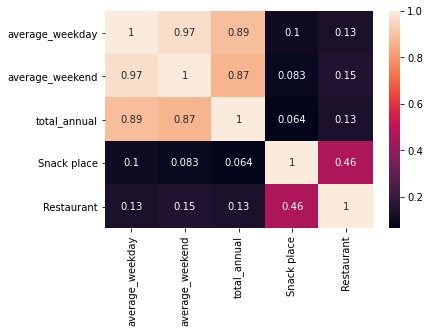

In [24]:
corrMatrix = stations_venues[['average_weekday', 'average_weekend', 'total_annual','Snack place', 'Restaurant']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Cluster Stations

#### Run _k_-means to cluster the stations into 5 clusters.

In [25]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [26]:
# set number of clusters
kclusters = 4

stations_venues_clustering = stations_venues.drop(['Station', 'GTFS Latitude', 'GTFS Longitude', 'Restaurant'], axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stations_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 3, 1, 3, 0, 0, 1], dtype=int32)

#### Let's create a new dataframe that includes the cluster information

In [27]:
# add clustering labels
stations_venues.insert(1, 'Cluster Labels', kmeans.labels_)
stations_venues

,Station,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
0,1 Av,0,40.730953,-73.981628,0.088572,0.051647,0.080961,0.1,0.333333
1,103 St,0,40.795379,-73.959104,0.047525,0.042914,0.141926,0.0,0.000000
2,103 St-Corona Plaza,3,40.749865,-73.862700,0.096136,0.102507,0.097198,0.5,0.333333
3,104 St,0,40.688445,-73.841006,0.009916,0.005200,0.018841,0.0,0.000000
4,110 St,3,40.795020,-73.944250,0.050443,0.048029,0.049708,0.4,0.111111
...,...,...,...,...,...,...,...,...,...
293,Woodhaven Blvd,0,40.713493,-73.860402,0.059685,0.052611,0.117515,0.1,0.000000
294,Woodlawn,1,40.886037,-73.878751,0.031409,0.030196,0.030892,0.2,0.000000
295,Woodside-61 St,3,40.745630,-73.902984,0.080231,0.085093,0.080961,0.4,0.555556
296,York St,0,40.701397,-73.986751,0.060488,0.054856,0.059119,0.0,0.000000


#### Visualize the resulting clusters

In [28]:
import numpy as np # library to handle data in a vectorized manner

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stations_venues['GTFS Latitude'], stations_venues['GTFS Longitude'], stations_venues['Station'], stations_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

k clustering of snack, coffee and fast foods based on their location -> it is expected to indicate per each subway station the competition and the possibility of revenues

### Cluster 1

In [30]:
stations_venues.loc[stations_venues['Cluster Labels'] == 0]

,Station,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
0,1 Av,0,40.730953,-73.981628,0.088572,0.051647,0.080961,0.1,0.333333
1,103 St,0,40.795379,-73.959104,0.047525,0.042914,0.141926,0.0,0.000000
3,104 St,0,40.688445,-73.841006,0.009916,0.005200,0.018841,0.0,0.000000
7,121 St,0,40.700492,-73.828294,0.010238,0.005428,0.009041,0.0,0.000000
8,125 St,0,40.809645,-73.948451,0.093729,0.096928,0.380203,0.1,0.000000
...,...,...,...,...,...,...,...,...,...
291,Wilson Av,0,40.688764,-73.904046,0.019758,0.014591,0.018508,0.0,0.000000
292,Winthrop St,0,40.656652,-73.950200,0.030530,0.016908,0.027623,0.0,0.111111
293,Woodhaven Blvd,0,40.713493,-73.860402,0.059685,0.052611,0.117515,0.1,0.000000
296,York St,0,40.701397,-73.986751,0.060488,0.054856,0.059119,0.0,0.000000


In [31]:
stations_venues.loc[stations_venues['Cluster Labels'] == 1]

,Station,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
5,116 St,1,40.801937,-73.948708,0.051248,0.051547,0.155822,0.2,0.000000
9,135 St,1,40.816062,-73.944209,0.046285,0.040645,0.091239,0.3,0.111111
10,137 St-City College,1,40.822008,-73.953676,0.059636,0.053978,0.058313,0.2,0.222222
16,15 St-Prospect Park,1,40.660365,-73.979493,0.029672,0.027077,0.028893,0.3,0.333333
20,163 St-Amsterdam Av,1,40.836013,-73.939892,0.019741,0.022653,0.020050,0.2,0.111111
...,...,...,...,...,...,...,...,...,...
277,Sutphin Blvd,1,40.705460,-73.810708,0.019931,0.018276,0.019358,0.2,0.000000
278,Sutphin Blvd-Archer Av-JFK Airport,1,40.700486,-73.807969,0.115401,0.097321,0.111896,0.2,0.111111
280,Sutter Av-Rutland Rd,1,40.664717,-73.922610,0.031627,0.023018,0.029740,0.3,0.000000
290,Wall St,1,40.707189,-74.010481,0.107666,0.049635,0.193166,0.3,0.111111


In [32]:
stations_venues.loc[stations_venues['Cluster Labels'] == 2]

,Station,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
13,14 St-Union Sq,2,40.735204,-73.990260,0.495757,0.511641,0.497396,0.1,0.000000
55,34 St-Herald Sq,2,40.749643,-73.987887,0.611251,0.582739,0.605204,0.0,0.111111
56,34 St-Penn Station,2,40.751330,-73.992224,0.408323,0.347413,0.793302,0.1,0.111111
72,59 St-Columbus Circle,2,40.768271,-73.981832,0.354856,0.350704,0.353482,0.2,0.555556
187,Grand Central-42 St,2,40.751992,-73.977359,0.766315,0.448391,0.703157,0.5,0.111111
281,Times Sq-42 St,2,40.755356,-73.987042,1.000000,1.000000,1.000000,0.2,0.444444


In [33]:
stations_venues.loc[stations_venues['Cluster Labels'] == 3]

,Station,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
2,103 St-Corona Plaza,3,40.749865,-73.862700,0.096136,0.102507,0.097198,0.5,0.333333
4,110 St,3,40.795020,-73.944250,0.050443,0.048029,0.049708,0.4,0.111111
6,116 St-Columbia University,3,40.807722,-73.964110,0.070927,0.047625,0.066101,0.6,0.000000
12,14 St,3,40.738982,-73.999367,0.220204,0.232085,0.444880,0.5,0.555556
14,145 St,3,40.824135,-73.943759,0.056312,0.060884,0.173530,0.4,0.111111
15,149 St-Grand Concourse,3,40.818393,-73.927035,0.062057,0.048969,0.059192,0.4,0.111111
18,157 St,3,40.834041,-73.944890,0.057576,0.051459,0.056234,0.4,0.555556
22,168 St,3,40.840719,-73.939561,0.096799,0.081454,0.093449,0.5,0.111111
28,18 Av,3,40.619460,-73.989707,0.020880,0.019437,0.063874,0.4,0.111111
34,191 St,3,40.855225,-73.929412,0.035537,0.031456,0.034570,0.5,0.222222


In [34]:
stations_venues.loc[stations_venues['Cluster Labels'] == 4]

,Station,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant


In [35]:
stations_venues.loc[stations_venues['Cluster Labels'] == 0].describe()

,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
count,153.0,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.0,40.718025,-73.924064,0.040035,0.035349,0.055256,0.046405,0.092229
std,0.0,0.079980,0.057456,0.041578,0.036708,0.075141,0.050034,0.145760
min,0.0,40.576312,-74.014065,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,40.672061,-73.972268,0.014824,0.012401,0.014948,0.000000,0.000000
50%,0.0,40.702068,-73.925741,0.024027,0.021872,0.027623,0.000000,0.000000
75%,0.0,40.756879,-73.894895,0.050401,0.051549,0.065389,0.100000,0.111111
max,0.0,40.903125,-73.755405,0.242872,0.225808,0.452713,0.100000,0.888889


In [36]:
stations_venues.loc[stations_venues['Cluster Labels'] == 1].describe()

,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
count,88.0,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000
mean,1.0,40.734964,-73.926338,0.049277,0.043277,0.061954,0.23750,0.217172
std,0.0,0.084683,0.056333,0.041743,0.034201,0.078968,0.04869,0.194218
min,1.0,40.577422,-74.023377,0.006986,0.004950,0.006646,0.20000,0.000000
25%,1.0,40.679941,-73.970867,0.023499,0.020680,0.022751,0.20000,0.000000
50%,1.0,40.718311,-73.937837,0.033068,0.030162,0.032123,0.20000,0.222222
75%,1.0,40.816073,-73.881303,0.059262,0.055153,0.075466,0.30000,0.333333
max,1.0,40.898379,-73.793604,0.224717,0.163082,0.557152,0.30000,0.888889


In [37]:
stations_venues.loc[stations_venues['Cluster Labels'] == 2].describe()

,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.0,40.751966,-73.986101,0.606084,0.540148,0.658757,0.183333,0.222222
std,0.0,0.010622,0.005541,0.243009,0.243124,0.227429,0.172240,0.222222
min,2.0,40.735204,-73.992224,0.354856,0.347413,0.353482,0.000000,0.000000
25%,2.0,40.750065,-73.989666,0.430181,0.375126,0.524348,0.100000,0.111111
50%,2.0,40.751661,-73.987464,0.553504,0.480016,0.654180,0.150000,0.111111
75%,2.0,40.754515,-73.983135,0.727549,0.564965,0.770766,0.200000,0.361111
max,2.0,40.768271,-73.977359,1.000000,1.000000,1.000000,0.500000,0.555556


In [38]:
stations_venues.loc[stations_venues['Cluster Labels'] == 3].describe()

,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
count,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,3.0,40.748751,-73.932052,0.062928,0.054532,0.075639,0.488235,0.328976
std,0.0,0.078217,0.054095,0.055749,0.048561,0.080540,0.116012,0.266630
min,3.0,40.611486,-74.030876,0.017561,0.011287,0.016288,0.400000,0.000000
25%,3.0,40.703049,-73.973610,0.029704,0.024815,0.030245,0.400000,0.111111
50%,3.0,40.742626,-73.939850,0.047752,0.044181,0.049708,0.500000,0.222222
75%,3.0,40.813057,-73.903909,0.075830,0.061913,0.080074,0.550000,0.555556
max,3.0,40.893193,-73.783817,0.283509,0.245515,0.444880,1.000000,1.000000


In [39]:
stations_venues.loc[stations_venues['Cluster Labels'] == 4].describe()

,Cluster Labels,GTFS Latitude,GTFS Longitude,average_weekday,average_weekend,total_annual,Snack place,Restaurant
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
